# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

We will be working on this project to build a predictive model to assist the bank in identifying liability customers who are likely to purchase personal loans. This will help the marketing team effectively target the right customer segments, improving campaign efficiency and boosting loan conversions.
### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
churn = pd.read_csv("/content/BankChurners (1).csv")

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [ ]:
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

In [ ]:
# let's create a copy of the data
data = churn.copy()

###Displaying the first and last few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* 15 variables are numerical 6 variables are object types.
* 2 columns have less than 10127 non-null values i.e. columns have missing values.

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.000,0.161,0.367,0.000,0.000,0.000,0.000,1.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


**Observations:**

* CLIENTNUM: CLIENTNUM being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* Customer_Age: The average age of the customers is 46 years.
* Dependent_count: The number of dependents are minimum of 0 and a maximum of 5.
* Months_on_book: 50% of the customers have 36 months of relationship with the bank.
* Total_Relationship_Count: Minimum 1 and maximum 6 products can be held by a customer.
* Months_Inactive_12_mon: 75% of the customers have had their credit card inactive for 3 or less than 3 months in the last 12 months.
* Contacts_Count_12_mon: The customers have a minimum of 0 and a maximum of 6 no. of contacts in the last 12 months.
* Credit_Limit: 50% of the customers have a credit limit equal to or less than 4549. There is a huge difference between the credit limit of 75% of the customers and maximum credit limit. That means there are few customers whose credit limit is on the higher end.
* Total_Revolving_Bal: Total_Revolving_Bal is minimum 0 and maximum 2517. Few customers pay the full balance of their credit account every month.
* Avg_Open_To_Buy: Few customers have 34516 unused amounts left on their credit card. These customers are the customers whose credit limit is 34516 which is the highest credit limit as the credit limit can not be less than Avg_Open_To_Buy. So these customers have not spent any amount from their credit card.
* Total_Trans_Amt: A customer's minimum transaction amount is 510. 75% of the customers have equal to or less than 4741 transaction amount. It seems there are lots of outliers in the data.
* Total_Trans_Ct: the highest transaction cunt a customer does is 139.
* Avg_Utilization_Ratio: 75% of the customers' Avg_Utilization_Ratio is 0.503 which means they spend 50% of their available credit. The maximum value is 0.999, those customers spent almost the total available credit.
* Attrition_Flag: 75% of the customers in data are not Attrited.

In [ ]:

# let's view the statistical summary of the object type columns in the data
data.describe(include=['object']).T

,count,unique,top,freq
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


###Checking the number of occurrences of each unique value in each categorical column

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

####Observations on Customer_Age

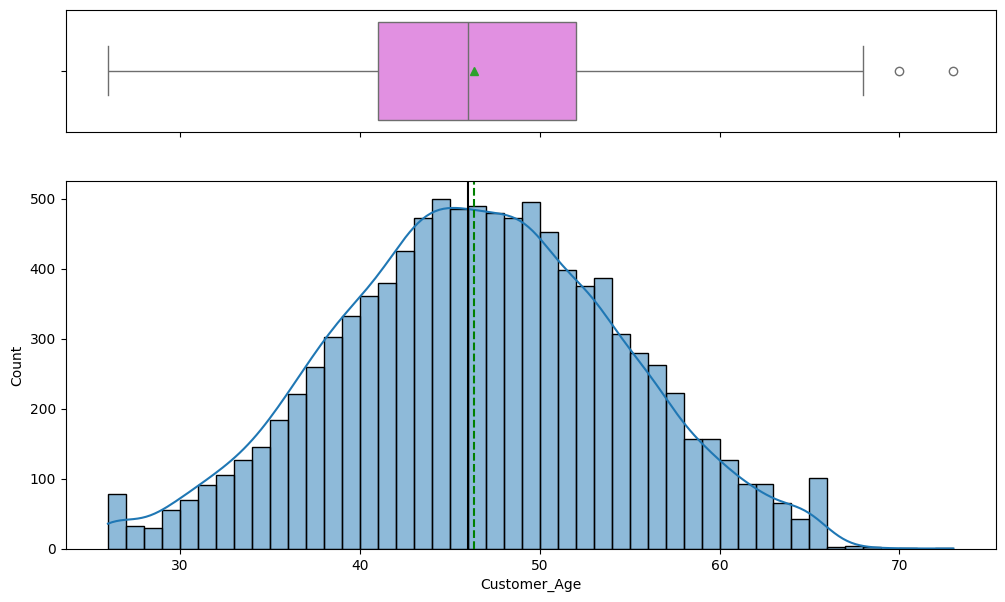

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Customer_Age has an approx. symmetric distribution with mean and median equal to 46.
* As evident from the boxplot, there are two outliers in the distribution for this variable.
*Let's explore it further.

In [ ]:
data[data["Customer_Age"] >=70]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,0,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.000,1125,3344.000,1.363,1765,34,1.615,0.252
254,0,70,M,0,High School,Married,Less than $40K,Blue,56,3,2,3,3252.000,1495,1757.000,0.581,1227,15,0.875,0.460


* These might be valid data and we will not treat them as outliers.

####Observations on Months_on_book


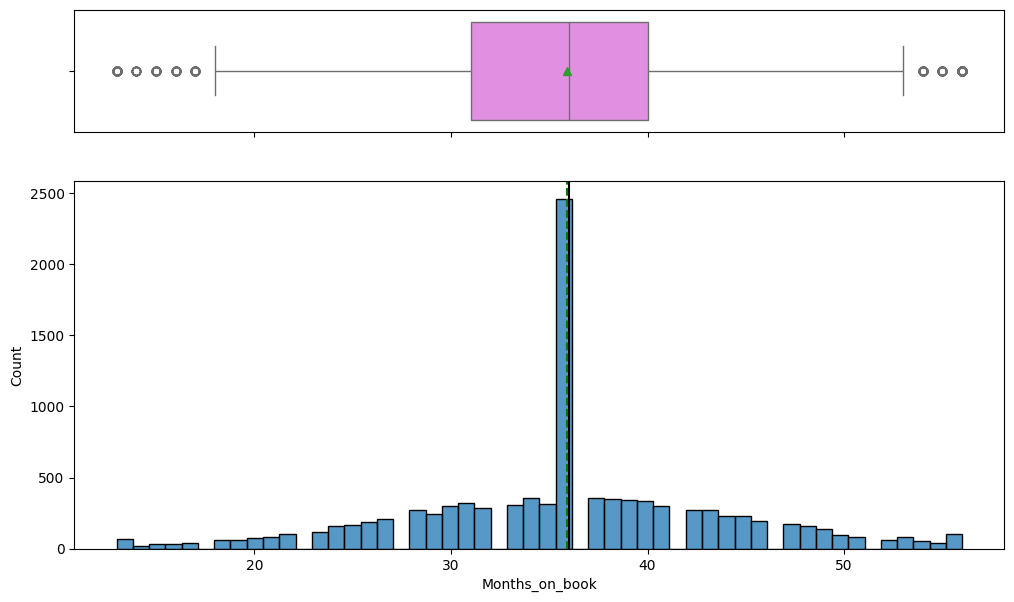

In [ ]:
histogram_boxplot(data, "Months_on_book")
plt.savefig("output.jpg", bbox_inches='tight')

* The Months_on_book has a symmetric distribution with a mean and median equal to 36.
* As evident from the boxplot, there are outliers in the distribution for this variable in both the quartiles.
* At approximately 36 months the customer count is a lot more than other data points. Let's check it.

In [ ]:
data[data['Months_on_book']==36]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
5,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
8,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,0,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,0,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.000,1558,4081.000,0.614,16628,109,0.946,0.276
10116,0,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.000,2241,10946.000,0.689,15354,112,0.931,0.170
10118,1,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000


* We can see that 2463 customers have 36-month periods of relationship with the bank.



####Observations on Credit_Limit


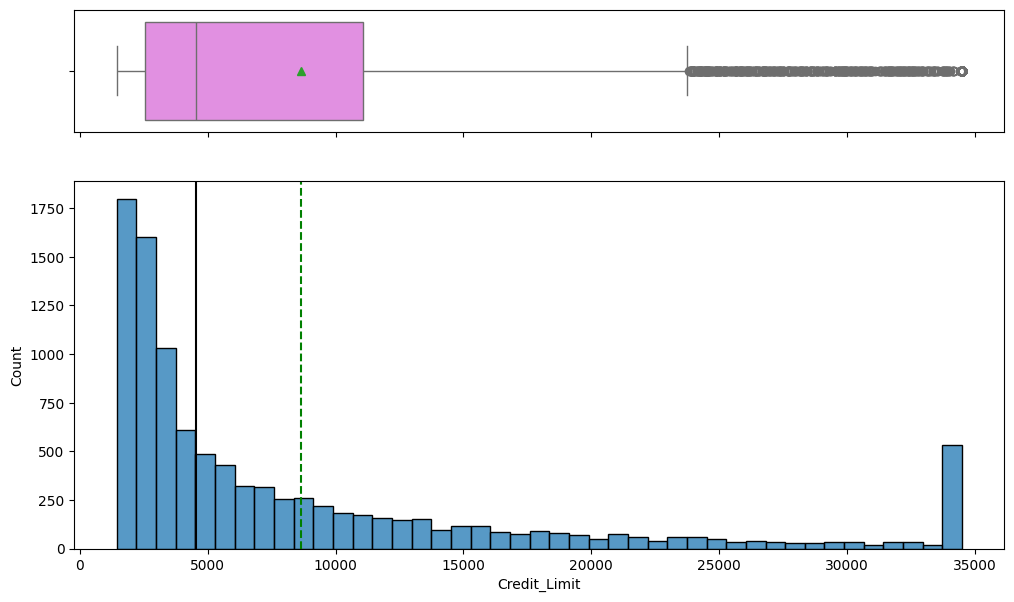

In [ ]:
histogram_boxplot(data, "Credit_Limit")
plt.savefig("output.jpg", bbox_inches='tight')

* Distribution of Credit_Limit is right-skewed.
* There are lots of outliers present in the graph in the upper-quartile which means there are few customers who have very high-value credit limits.
* We can see from the graph that the customer count is higher when the credit limit is below 5000 and then the customer count decreases gradually with increasing value of the credit limit. But when the credit limit is slightly below 35000 the customer count spiked up.

**Let's check the customers having the credit spike in outlier section.**

In [ ]:
condition1 = data['Credit_Limit']>32000  # First condition: values in column 'A' greater than 2
condition2 = data['Credit_Limit']<35000 # Second condition: values in column 'B' less than 9
data[condition1 & condition2]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
40,0,45,M,3,Graduate,Single,$80K - $120K,Blue,41,2,2,2,32426.000,578,31848.000,1.042,1109,28,0.474,0.018
45,0,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.000,0,34516.000,1.621,1444,28,1.333,0.000
61,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.000,0,34516.000,0.763,691,15,0.500,0.000
65,0,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,4,1,4,34516.000,1515,33001.000,0.592,1293,32,0.600,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,0,45,M,2,Graduate,Single,$60K - $80K,Silver,33,4,2,2,34516.000,1529,32987.000,0.609,13940,105,0.810,0.044
10095,0,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.000,1099,33417.000,0.816,15490,110,0.618,0.032
10098,1,55,M,3,Graduate,Single,$120K +,Silver,36,4,3,4,34516.000,0,34516.000,1.007,9931,70,0.750,0.000
10110,0,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.000,1091,33425.000,0.640,15274,108,0.714,0.032


In [ ]:
data[data['Credit_Limit']==34516]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
45,0,49,M,4,Uneducated,Single,$80K - $120K,Blue,30,3,2,3,34516.000,0,34516.000,1.621,1444,28,1.333,0.000
61,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.000,0,34516.000,0.763,691,15,0.500,0.000
65,0,51,M,4,Uneducated,Single,$80K - $120K,Silver,38,4,1,4,34516.000,1515,33001.000,0.592,1293,32,0.600,0.044
70,0,51,M,4,Graduate,Single,$120K +,Blue,42,3,2,3,34516.000,1763,32753.000,1.266,1550,41,1.050,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,0,45,M,2,Graduate,Single,$60K - $80K,Silver,33,4,2,2,34516.000,1529,32987.000,0.609,13940,105,0.810,0.044
10095,0,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.000,1099,33417.000,0.816,15490,110,0.618,0.032
10098,1,55,M,3,Graduate,Single,$120K +,Silver,36,4,3,4,34516.000,0,34516.000,1.007,9931,70,0.750,0.000
10110,0,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.000,1091,33425.000,0.640,15274,108,0.714,0.032


####Observations on Total_Revolving_Bal


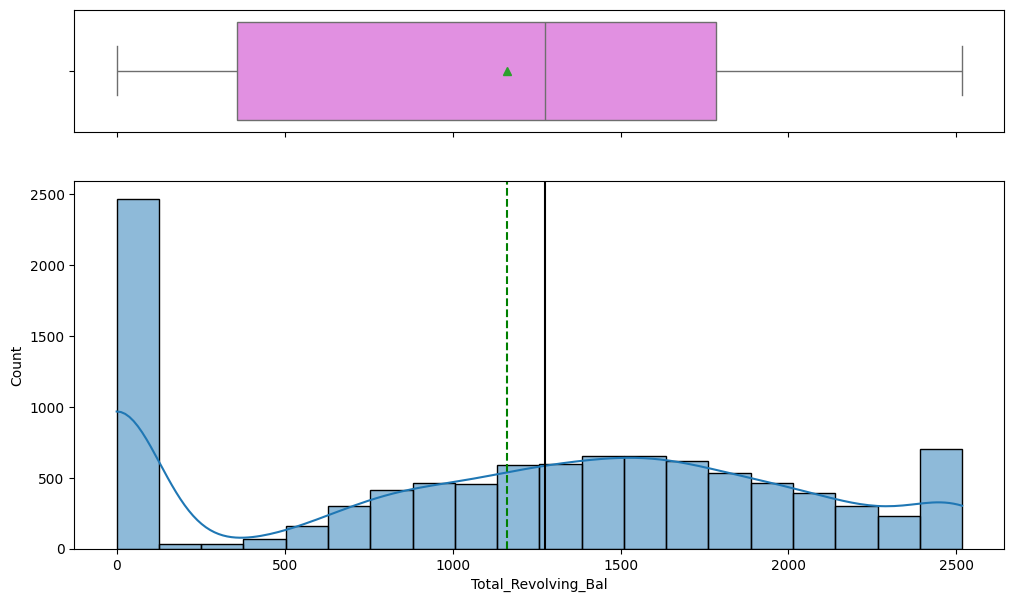

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Many customers pay the balance of the  credit account in full every month, so their Total_Revolving_Bal is 0.
* There are also many customers whose Total_Revolving_Bal is on the higher end.
* There are no outliers present in the graph.

In [ ]:
data[data['Total_Revolving_Bal']==0]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
12,0,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
21,1,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.300,0,1438.300,1.047,692,16,0.600,0.000
24,0,54,M,2,NaN,Married,$80K - $120K,Blue,42,4,2,3,12217.000,0,12217.000,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,0,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.000,0,4165.000,0.813,17093,111,0.820,0.000
10112,1,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.000,0,34516.000,1.004,9338,73,0.622,0.000
10114,0,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.000,0,4700.000,0.617,14723,96,0.655,0.000
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000


* 2470 customers do not have any revolving credit.

In [ ]:
data[data['Total_Revolving_Bal']>2300]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
8,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
16,0,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,2,3,30367.000,2362,28005.000,1.708,1671,27,0.929,0.078
18,0,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.000,2517,676.000,1.831,1336,30,1.143,0.788
32,0,41,M,4,Graduate,Married,$60K - $80K,Blue,36,4,1,2,8923.000,2517,6406.000,1.726,1589,24,1.667,0.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,0,41,F,4,Graduate,Divorced,$40K - $60K,Blue,36,4,1,0,5654.000,2470,3184.000,0.637,15123,111,0.881,0.437
10078,0,40,M,3,High School,Divorced,$60K - $80K,Blue,36,3,1,2,16268.000,2517,13751.000,0.652,15925,124,0.824,0.155
10079,0,45,M,4,Graduate,Single,$60K - $80K,Silver,36,2,3,4,28564.000,2517,26047.000,0.711,14875,107,0.783,0.088
10113,1,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.000,2517,10786.000,0.929,10219,85,0.809,0.189


####Observations on Avg_Open_To_Buy


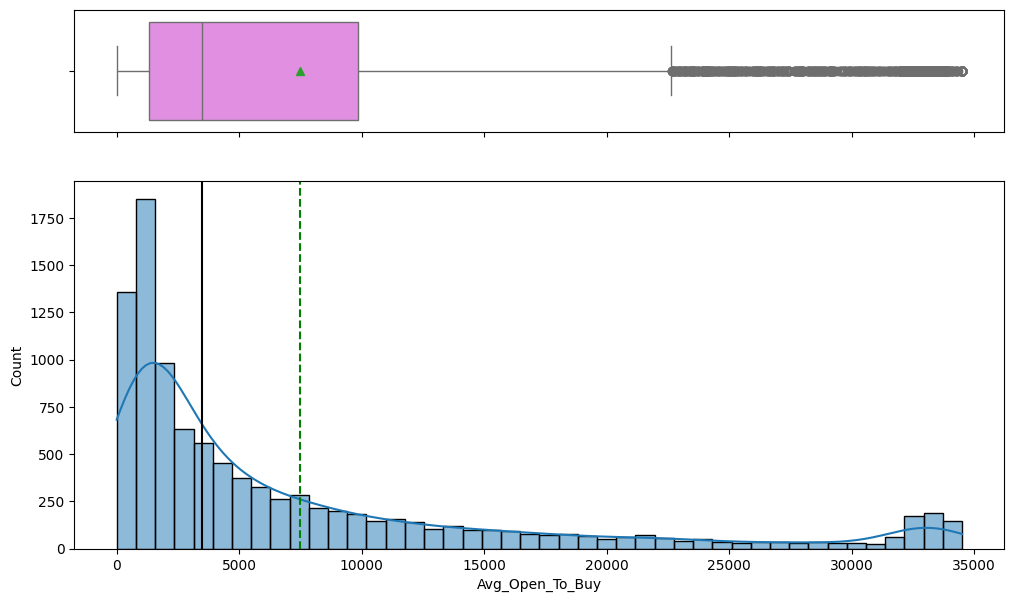

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)
plt.savefig("output.jpg", bbox_inches='tight')


* Distribution of Avg_Open_To_Buy is right-skewed.
* There are lots of outliers present in the graph in the upper quartile which means there are few customers who have a higher amount left on their credit card to use.
* Most of the customers have less than 5000 left on their credit card to use.

####Observations on Total_Trans_Ct

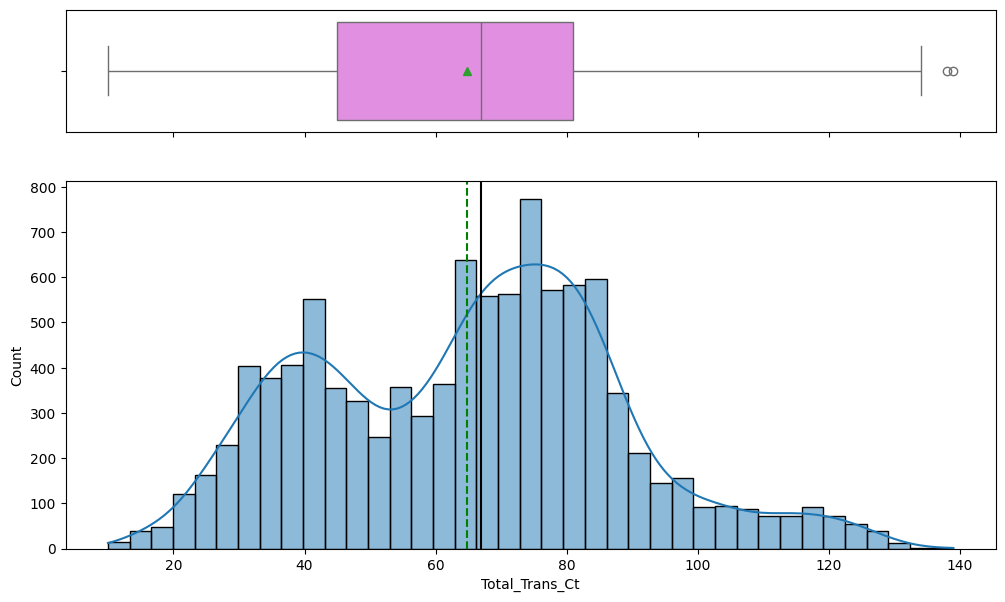

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)
plt.savefig("output.jpg", bbox_inches='tight')


* Distribution of Total_Trans_Ct is slightly right-skewed.
* There are outliers in the graph.

####Observations on Total_Amt_Chng_Q4_Q1

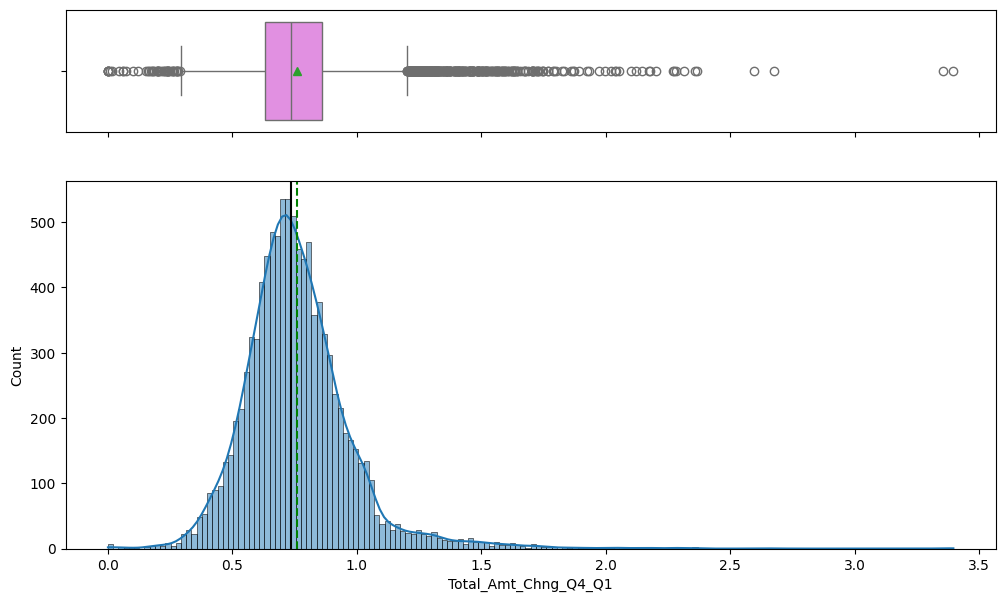

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)
plt.savefig("output.jpg", bbox_inches='tight')


* Distribution of Total_Amt_Chng_Q4_Q1 is slightly right-skewed.
* There are lots of outliers present in the graph in the upper quartile and also a few outliers are present in the lower quartile.


**Let's see total transaction amount distributed**

####Observations on Total_Trans_Amt

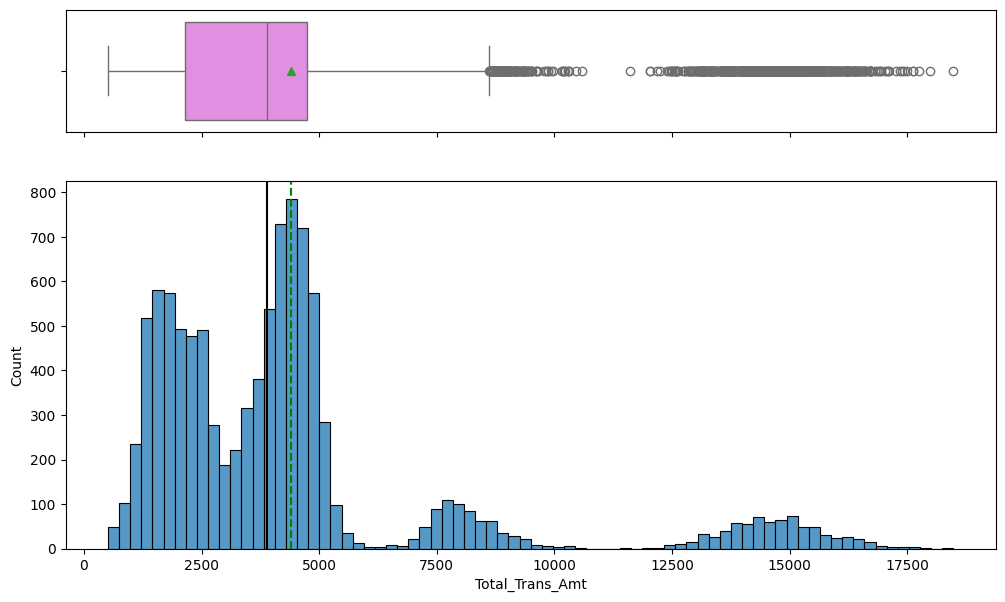

In [ ]:
histogram_boxplot(data, 'Total_Trans_Amt')
plt.savefig("output.jpg", bbox_inches='tight')

* Distribution of Total_Trans_Amt is right-skewed.
* There are lots of outliers present in the upper quartile which means there are few customers whose average transaction amount exceeds 7000 in the last 12 months.



####Observations on Total_Ct_Chng_Q4_Q1

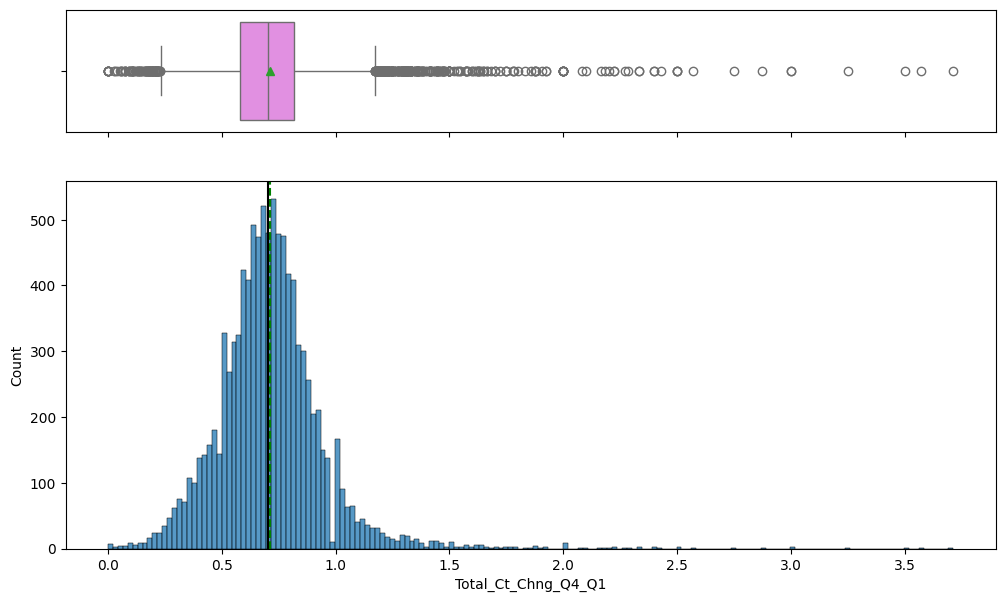

In [ ]:
histogram_boxplot(data,'Total_Ct_Chng_Q4_Q1')
plt.savefig("output.jpg", bbox_inches='tight')


* Distribution of Total_Ct_Chng_Q4_Q1 is normally distributed with a mean and median value of approx. 0.70.
* There are lots of outliers present in the graph in the upper quartile and also a few outliers are present in the lower quartile.

####Observations on Dependent_count

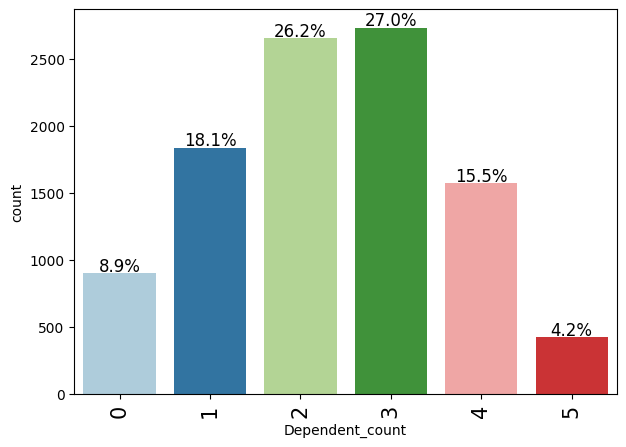

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Dependent_count",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 27% of customers have 3 dependents followed by 26%  and 18% having 2 & 1 dependents respectively.

####Observations on Total_Relationship_Count

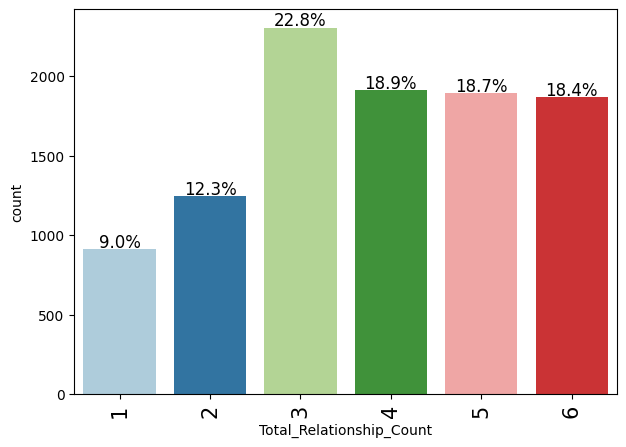

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Total_Relationship_Count",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 23% of customers hold 3 products.
* Percentage of customers holding 4,5,6 products are almost same.


####Observations on Months_Inactive_12_mon

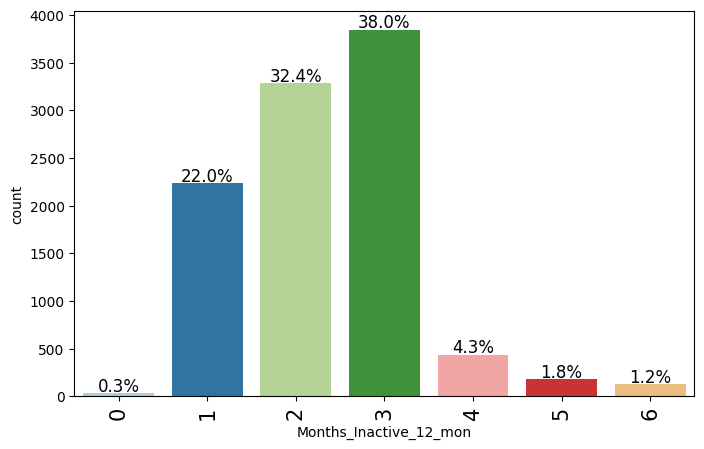

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Approximately 93% of customers' credit card remains inactive upto 3 months in the last 12 months.


####Observations on Contacts_Count_12_mon

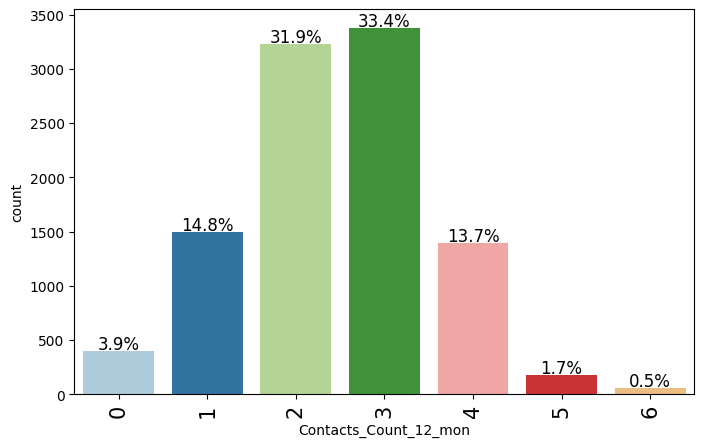

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 33.4% of customers have 3 contacts in the last 12 months.

####Observations on Gender

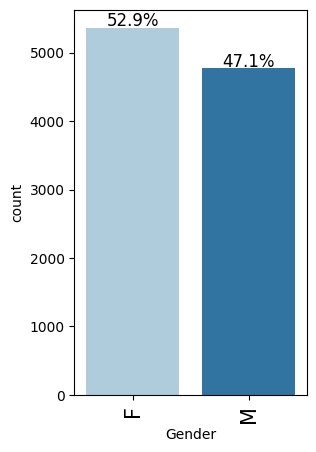

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Gender",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* The number of female account holders is more than the number of male account holders.

**Let's see the distribution of the level of education of customers**

####Observations on Education_Level

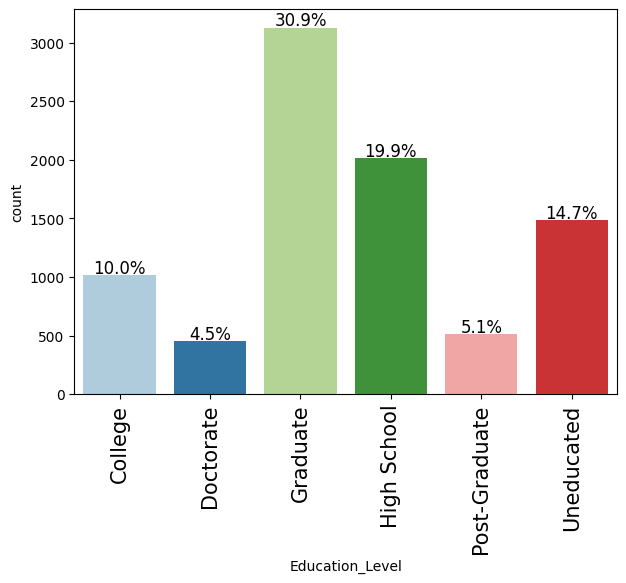

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Education_Level",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 31% of customers are qualified as Graduates, followed by 20% and 15% belong to High School and Uneducated category.


**As Education_Level has some missing values we can add unknown instead of nan to see how the distribution looks.**

In [ ]:
data1=data.copy()

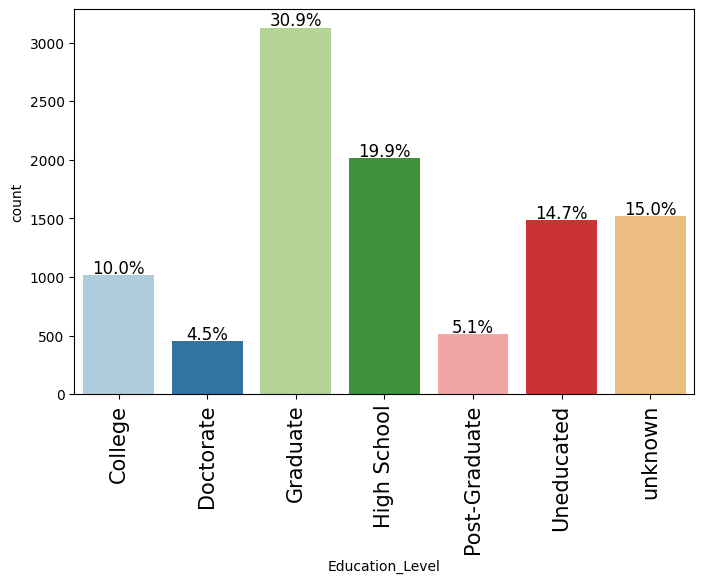

<Figure size 640x480 with 0 Axes>

In [ ]:
data1["Education_Level"] = data1["Education_Level"].replace(np.nan, "unknown")
labeled_barplot(data1, "Education_Level",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

####Observations on Marital_Status


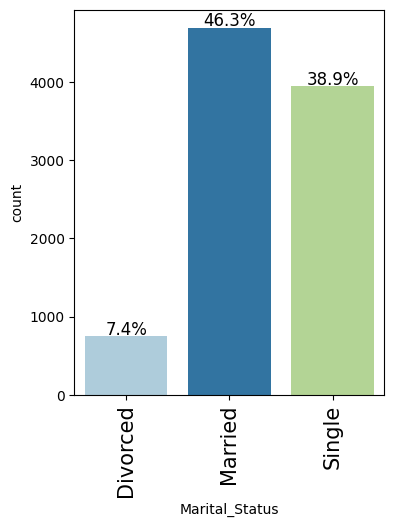

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Marital_Status",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Most of the account holders belong to the Married and Single category.

If Marital_Status has some missing values we can add unknown instead of nan to see how the distribution looks.

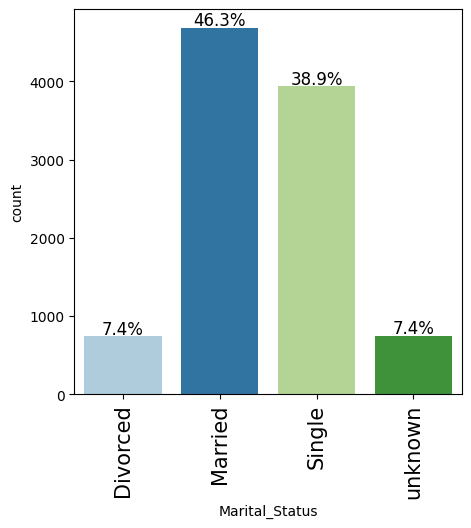

<Figure size 640x480 with 0 Axes>

In [ ]:
data1["Marital_Status"] = data1["Marital_Status"].replace(np.nan, "unknown")
labeled_barplot(data1, "Marital_Status",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

**Let's see the distribution of the level of income of customers**

####Observations on Income_Category


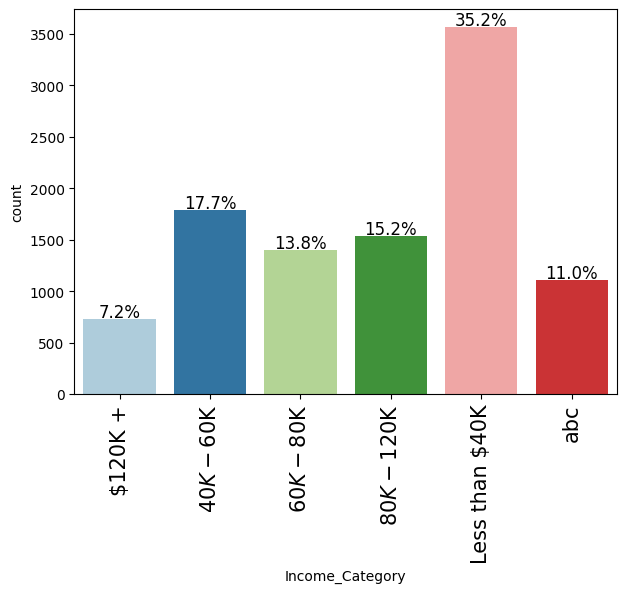

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Income_Category",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 35% of the customers have income less than $40K.
* 11% of the customers fall in abc income category which means they are unknown values. We will analyze it later.

####Observations on Card_Category

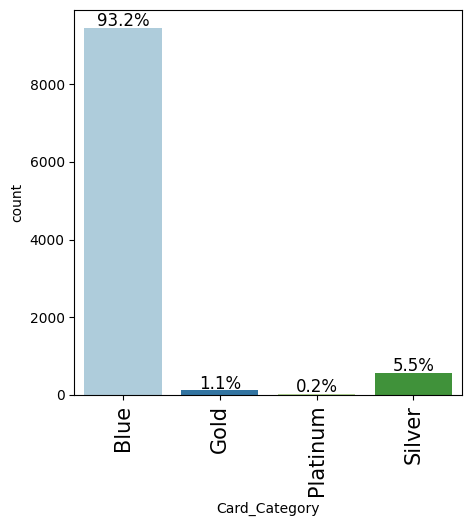

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Card_Category",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* Most of the customers have Blue cards.
* Only 0.2% of customers have a Platinum card.

####Observations on Attrition_Flag

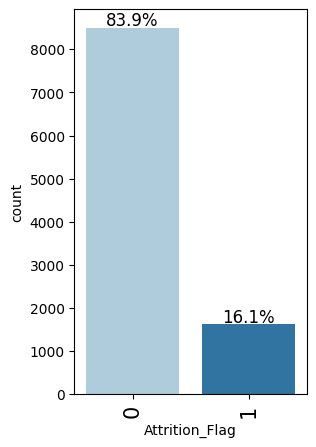

<Figure size 640x480 with 0 Axes>

In [ ]:
labeled_barplot(data, "Attrition_Flag",perc=True)
plt.savefig("output.jpg", bbox_inches='tight')

* 84% of the customers' accounts are not closed and they are "Existing Customers".
* 16% of the customers' accounts are closed and they are  "Attrited Customers".


### Bivariate Distributions


**Let's see the attributes that have a strong correlation with each other**


####Correlation Check

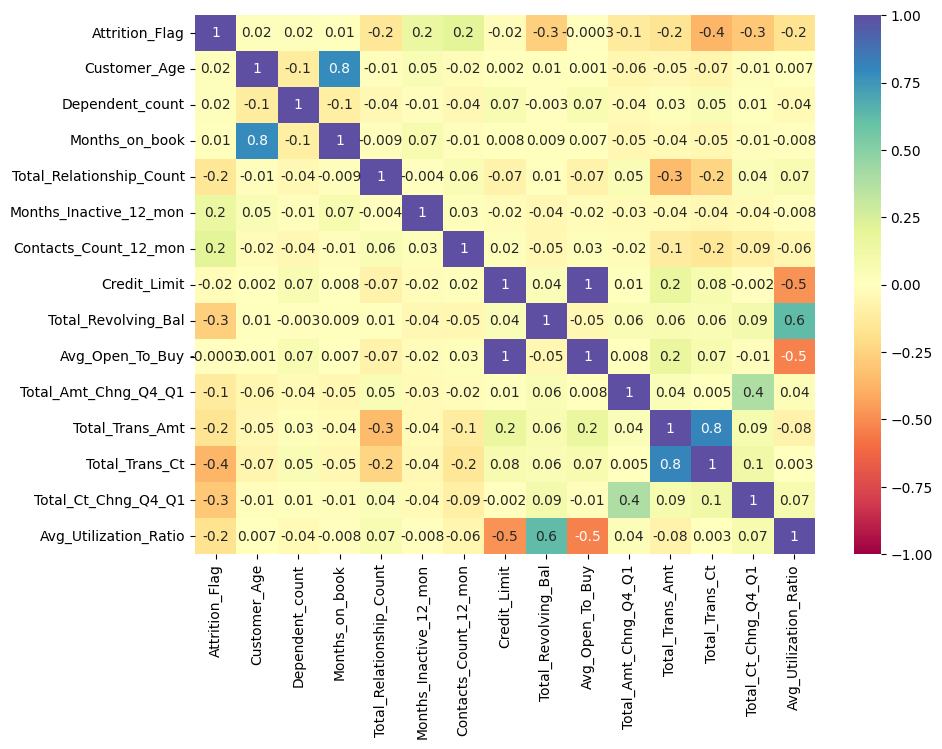

<Figure size 640x480 with 0 Axes>

In [ ]:
# Select numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap using numeric data
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

* Customer_Age and Period of relationship with the bank (in months) are highly positively correlated. (0.8)
* Total_Trans_Amt and Total_Trans_Ct are highly positively correlated. (0.8)
* Total_Revolving_Bal and Avg_Utilization_Ratio are positively correlated. (0.6)
* Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 are positively correlated. (0.4)
* Credit_Limit and Total_Trans_Amt are positively correlated. (0.2)
* Credit_Limit and Avg_Utilization_Ratio are negatively correlated. (-0.5)
* Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated. (-0.5)
* Total_Relationship_Count and Total_Trans_Amt are negatively correlated. (-0.3)
* Total_Relationship_Count and Total_Trans_Ct are negatively correlated. (-0.2)
* Attrition_Flag is negatively correlated with Total_Trans_Ct(-0.4), Total_Ct_Chng_Q4_Q1(-0.3), Total_Revolving_Bal(-0.3).
* Attrition_Flag is positively correlated with Months_Inactive_12_mon(0.2) and Contacts_Count_12_mon(0.2).


**we are doing pairplot to check the distribution of target class (quality-class) w.r.t other features.**

####Observations on Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


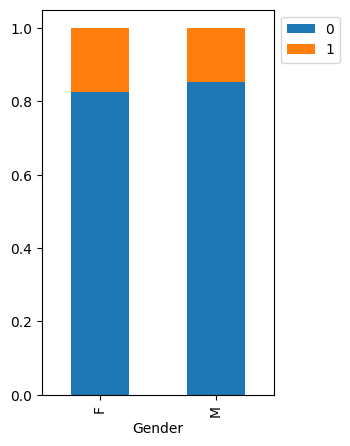

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* 17% of the female and 15% of the male account holders are Attrited Customers.


####Observations on Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


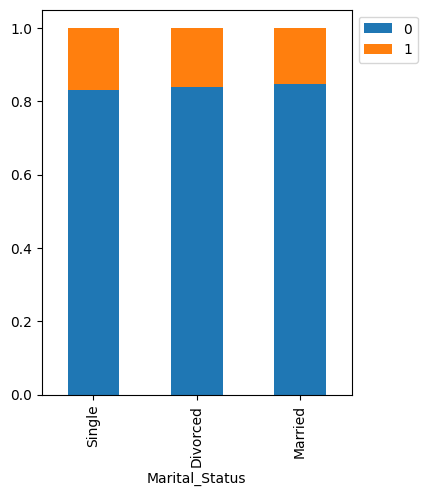

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The Marital_Status does not impact much on the number of Attrited Customers.


####Observations on Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


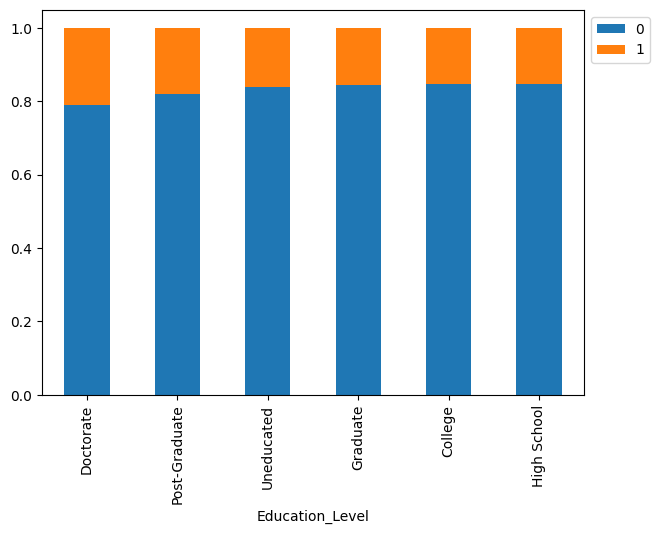

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* Though the number of Doctorate customers is less the number of Doctorate Attrited Customers is more as compared to others.


####Observations on Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


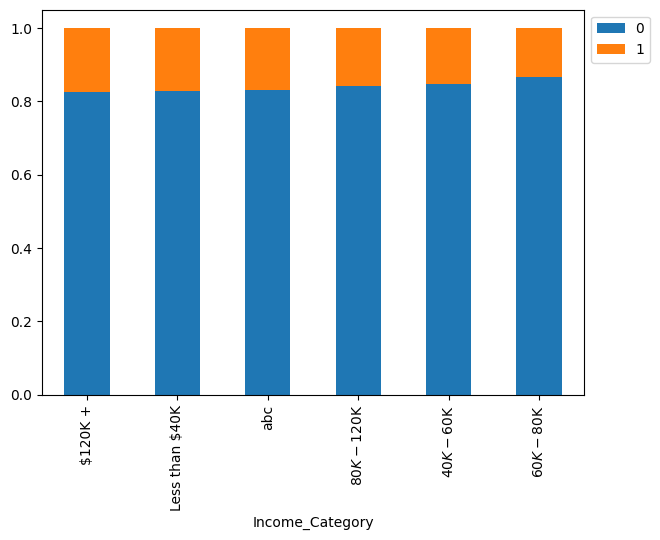

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The number of Attrited customers with income 60K-80K is less as compared to other income category customers.

####Observations on Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


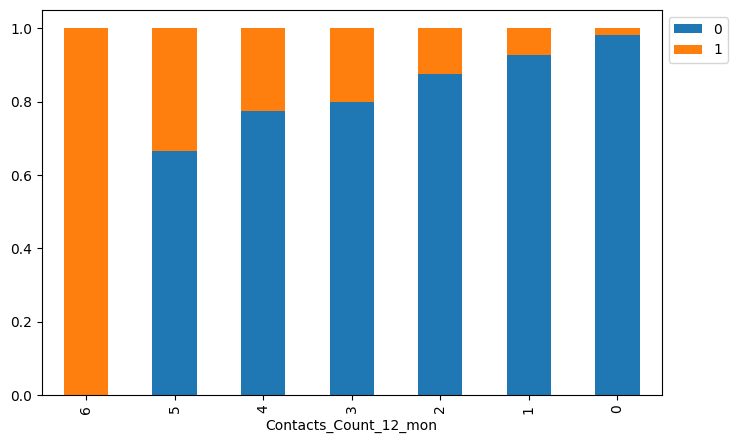

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* All the account holders who have 6 number of Contacts in the last 12 months are Attrited Customers.
* The percentage of Attrited Customers decreases based on the decrease in the number of Contacts in the last 12 months.
* We can see the difference in the count of Attrited Customers and Existing Customers based on the Contacts_Count_12_mon. So Contacts_Count_12_mon can be an important feature.


**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

####Observations on Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


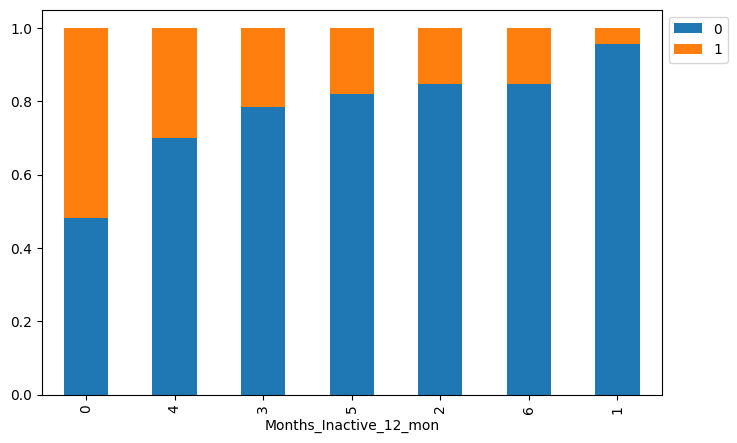

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')


* Only 4.5% of the customers whose credit cards have been inactive for 1 month in the last 12 months are Attrited.
* Credit card inactivity for Attrited Customers is highest for the value of 0 in the las 12 months. This tells us that customers who are using credit cards may initiate closure of the credit card account.

####Observations on Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


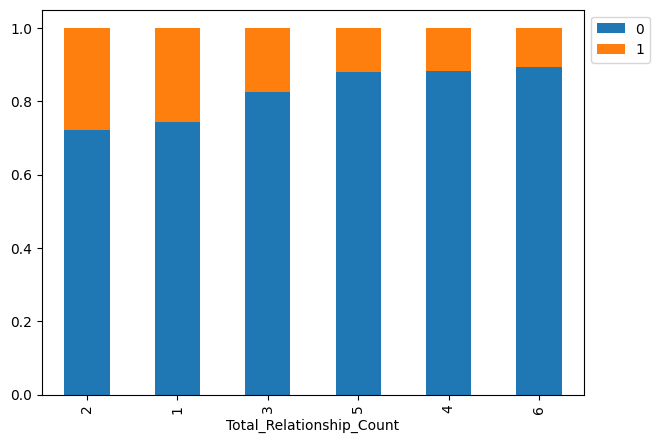

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* 28% of the customers with Total_Relationship_Count as 2 are Attrited which is highest among other categories.
* Higher number of products of a customer with the bank can reduce the probability of attrition.

####Observations on Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


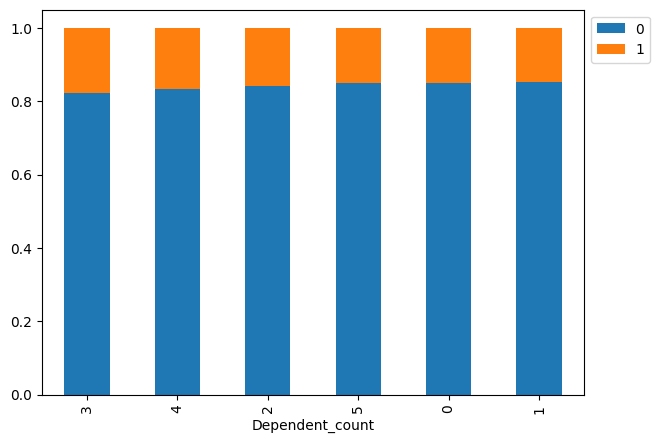

<Figure size 640x480 with 0 Axes>

In [ ]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The Dependent_count feature does not impact much on the number of Attrited customers and Existing Customers.


####Observations on  Attrition_Flag vs Total_Revolving_Bal

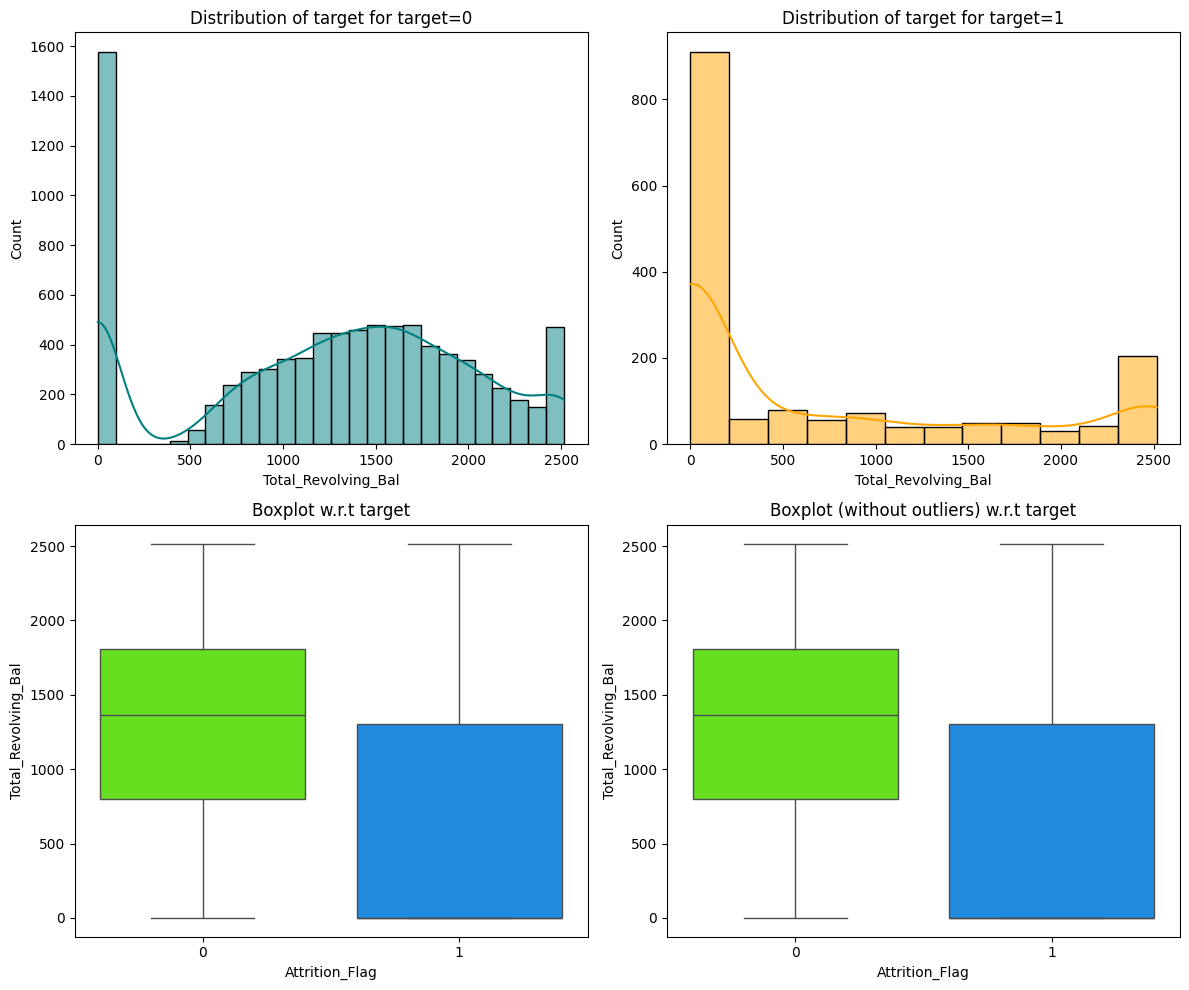

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* There's a stark difference between the Attrited Customers and the Existing Customers.
* Customers with a higher amount of  Total_Revolving_Bal would be Existing Customers and customers with a lower amount of  Total_Revolving_Bal would be Attrited Customers whose account is closed.
* There are also a few customers whose Total_Revolving_Bal amount is very high and their account is closed.



####Observations on  Attrition_Flag vs Credit_Limit

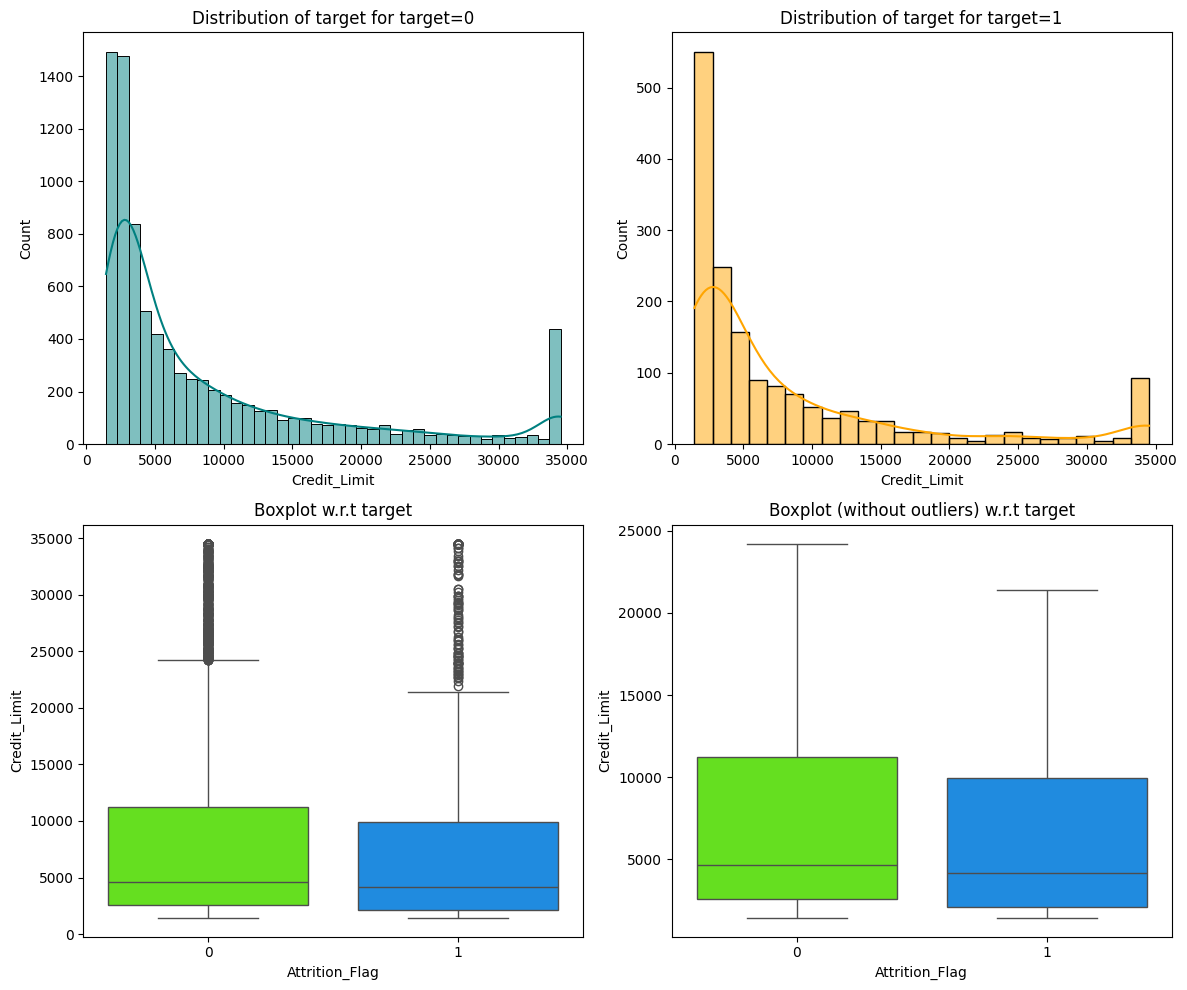

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The variance in the Credit_Limit is less for Attrited Customers as compared to the variance in Credit_Limit of Existing Customers.


####Observations on  Attrition_Flag vs Customer_Age

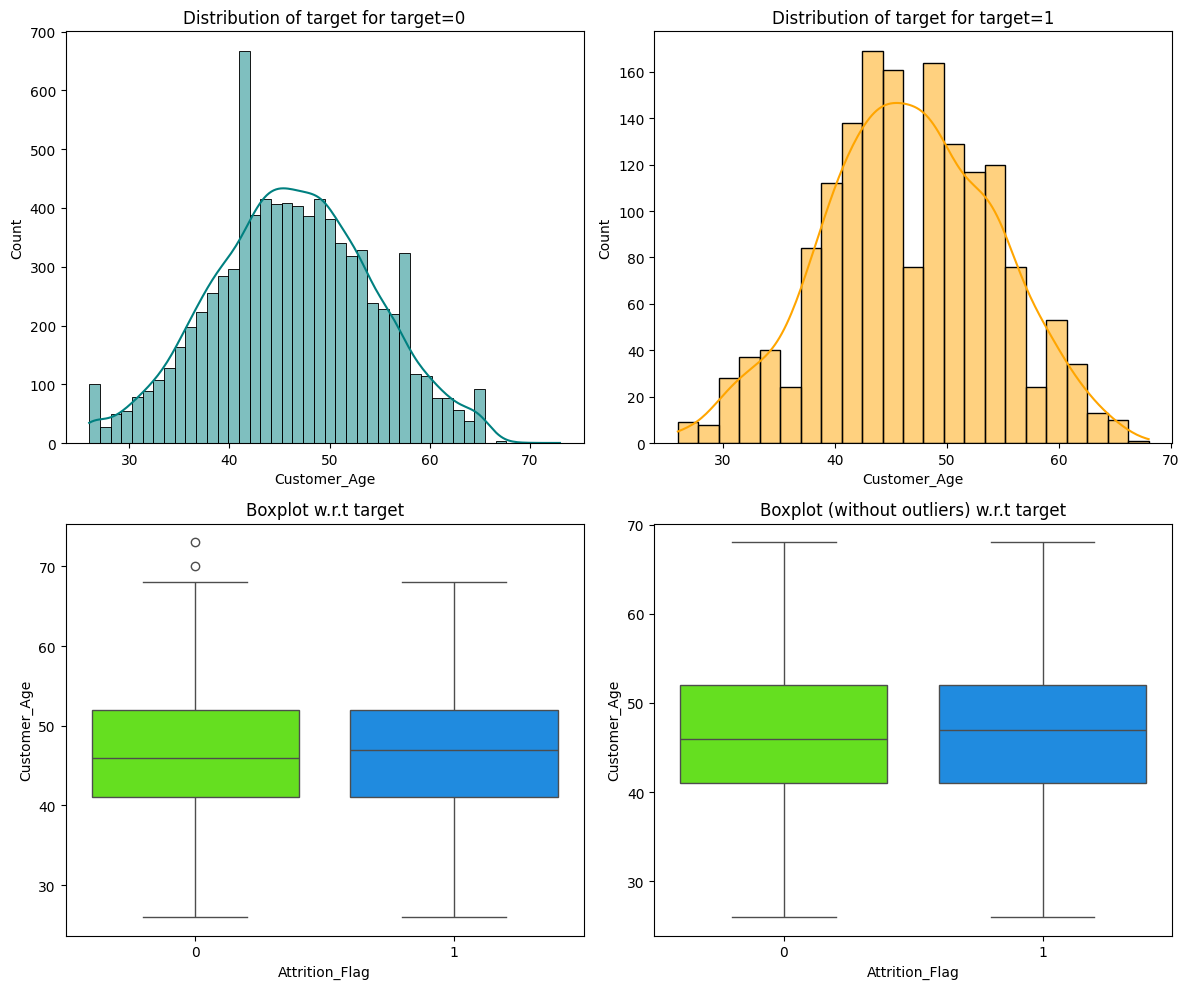

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The data indicates that the highest Attrition rates are found in the in the middle ages, i.e. early 40s to early 50s.

####Observations on  Attrition_Flag vs Total_Trans_Ct

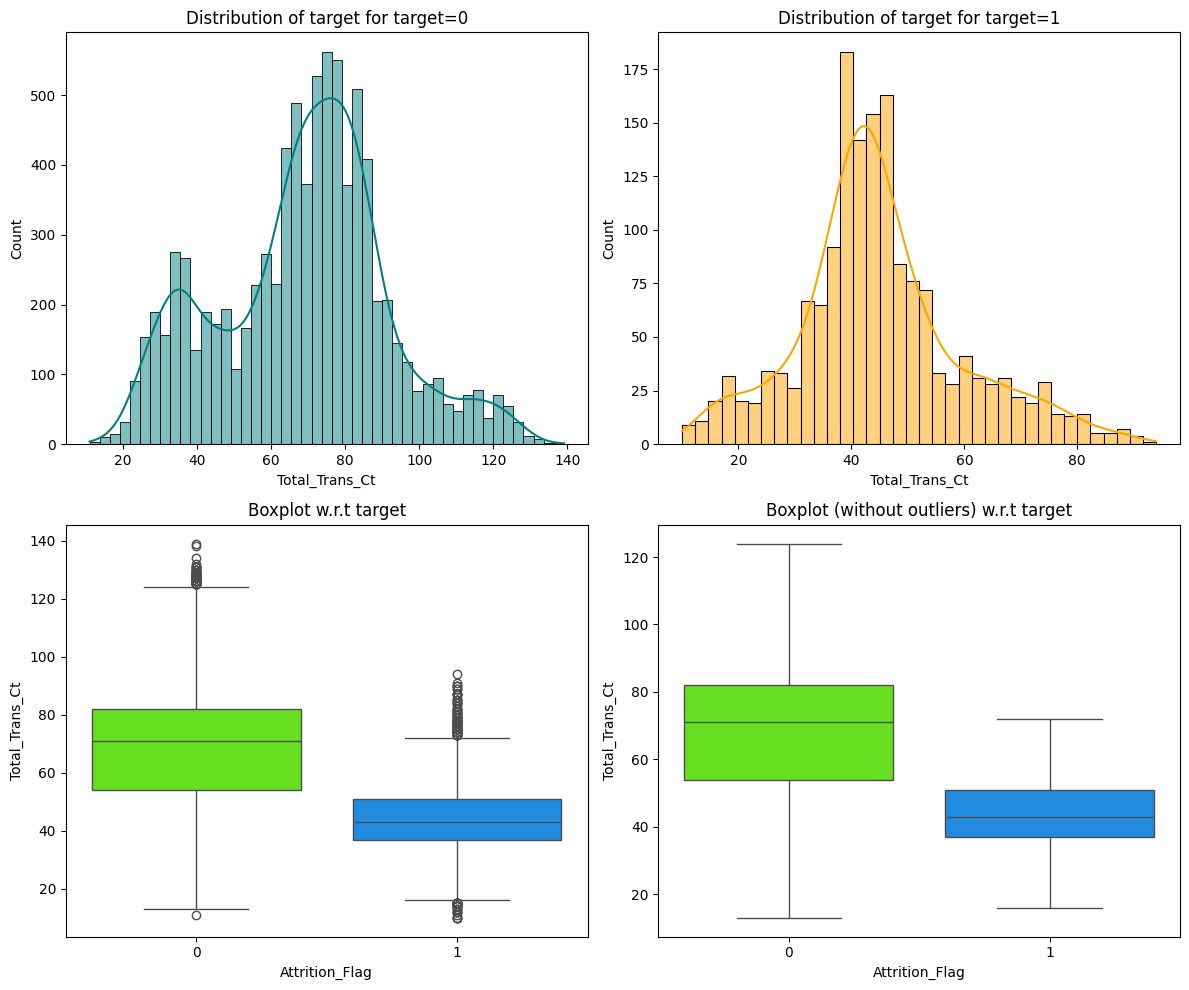

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* There's a stark difference between the Attrited Customers and the Existing Customers based on Total_Trans_Ct.
* Customers with a higher  Total Transaction Count (Last 12 months) would be less likely to be Attrited Customers as compared to the customers with a lower Total Transaction Count (Last 12 months).
* Customers with open accounts will have a higher Total Transaction Count as compared to the Transaction Count of the customers whose accounts are closed.

####Observations on  Attrition_Flag vs Total_Trans_Amt

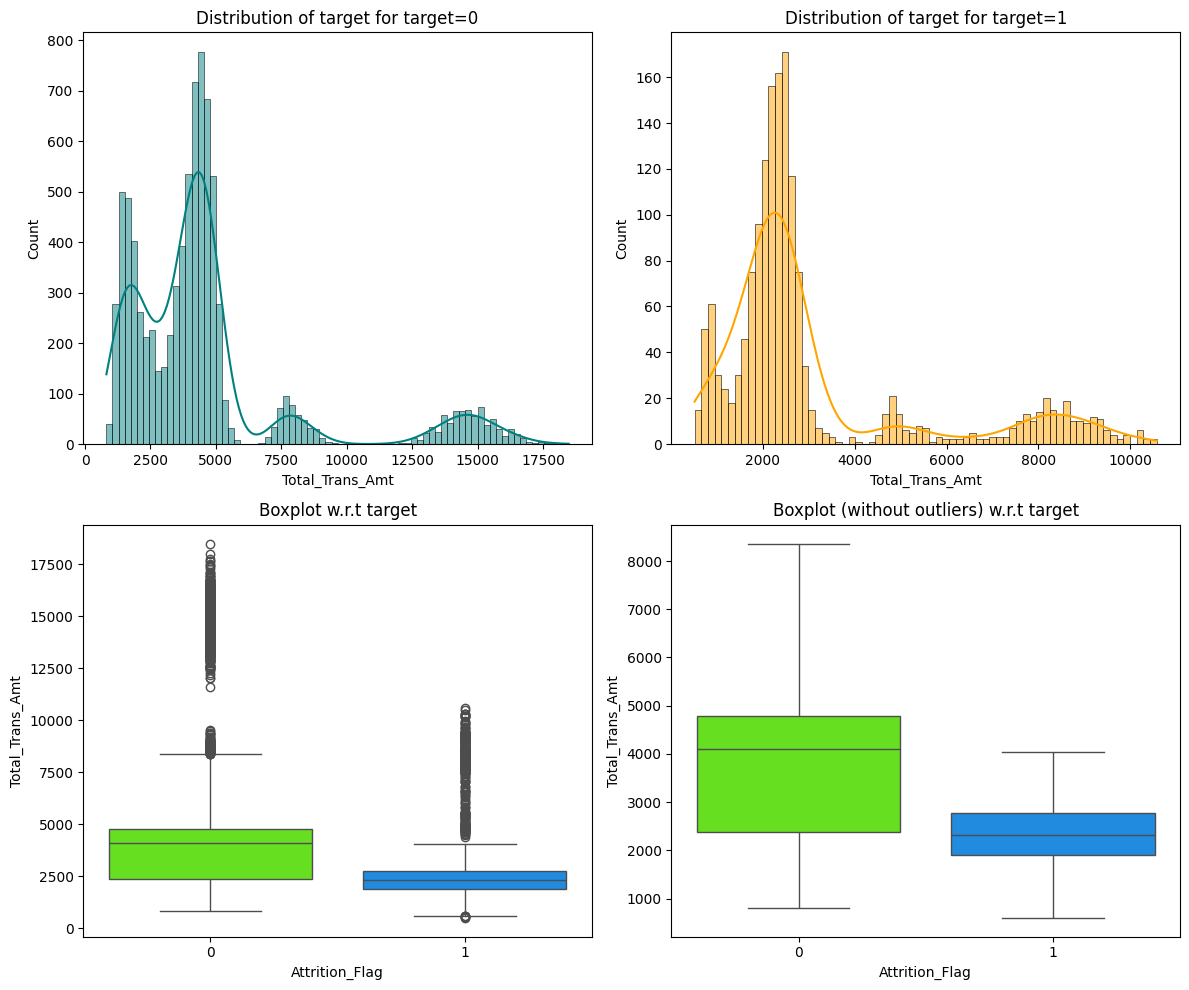

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* This graph is similar to the graph of Total_Trans_Ct vs Attrition_Flag.
* Customers with a higher  Total Transaction Amount (Last 12 months) would be less likely to be Attrited as compared to the customers with a lower Total Transaction Amount (Last 12 months).
* Customers with open accounts will have more transaction amounts as compared to the transaction amounts of the customers whose accounts are closed.


**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

####Observations on  Attrition_Flag vs Total_Ct_Chng_Q4_Q1

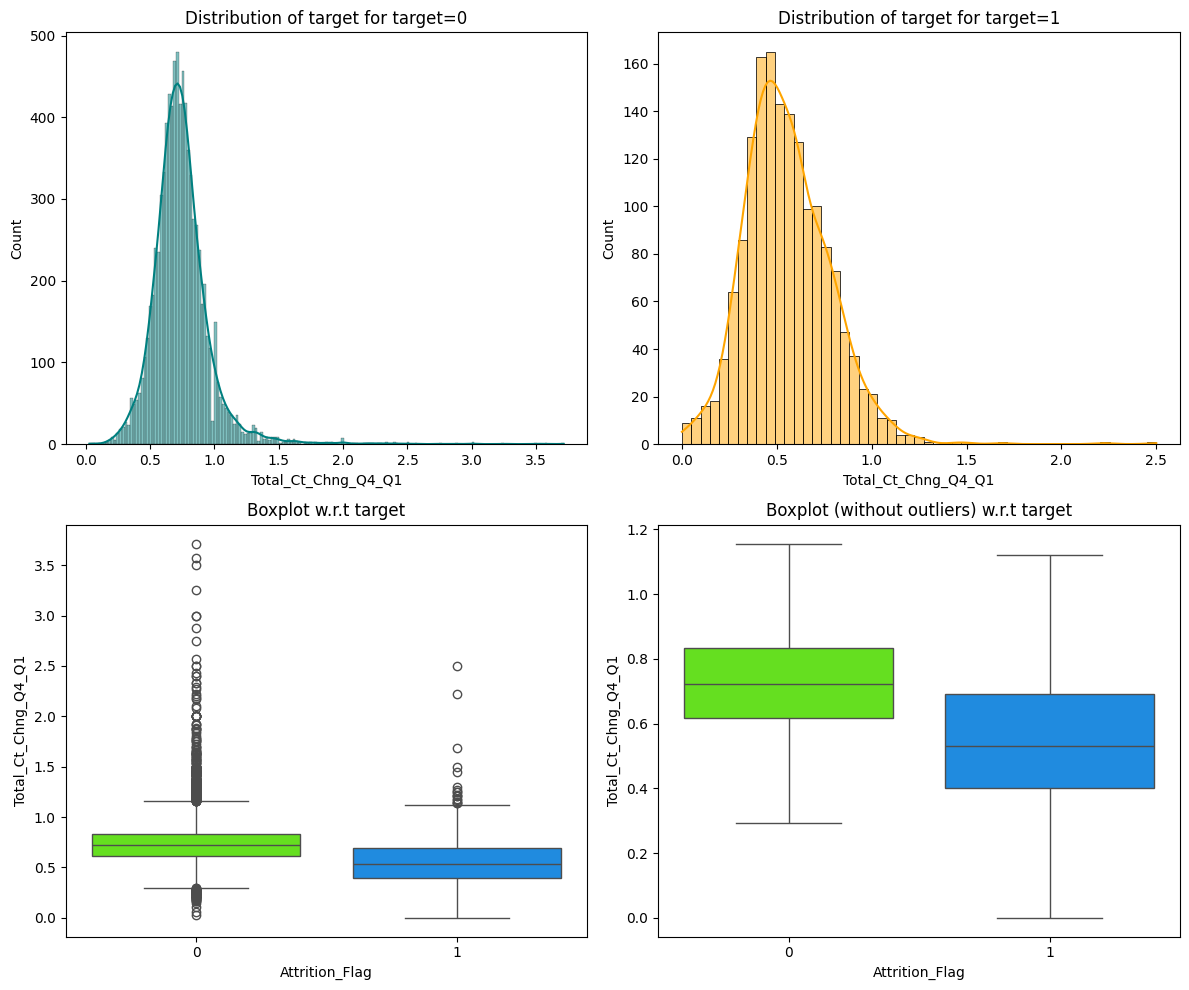

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* Change in Transaction Count (Q4 over Q1) is less for Existing Customers as compared to the Change in Transaction Count (Q4 over Q1) of Attrited Customers without outliers.
* Attrited Customers have the total count change from Q4 to Q1 starts at 0.4. Note that for Existing Customers this value starts from 0.6.


####Observations on  Attrition_Flag vs Avg_Utilization_Ratio

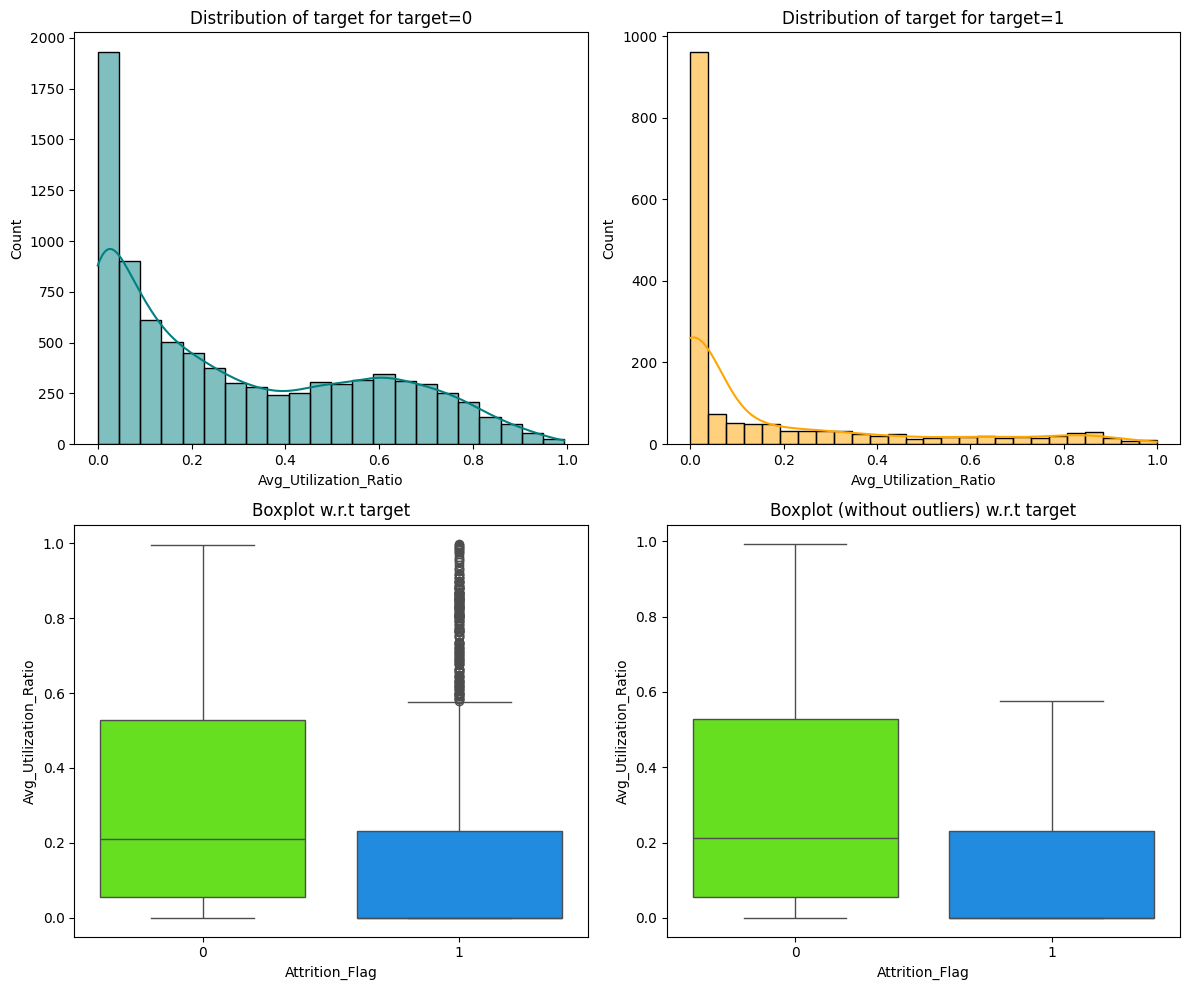

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* Customers with a higher Avg_Utilization_Ratio would be less likely to be Attrited as compared to the customers with a lower Avg_Utilization_Ratio .

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. The customers whose accounts are not closed spent much as compared to the Attrited Customers whose accounts are closed.



####Observations on  Attrition_Flag vs Months_on_book

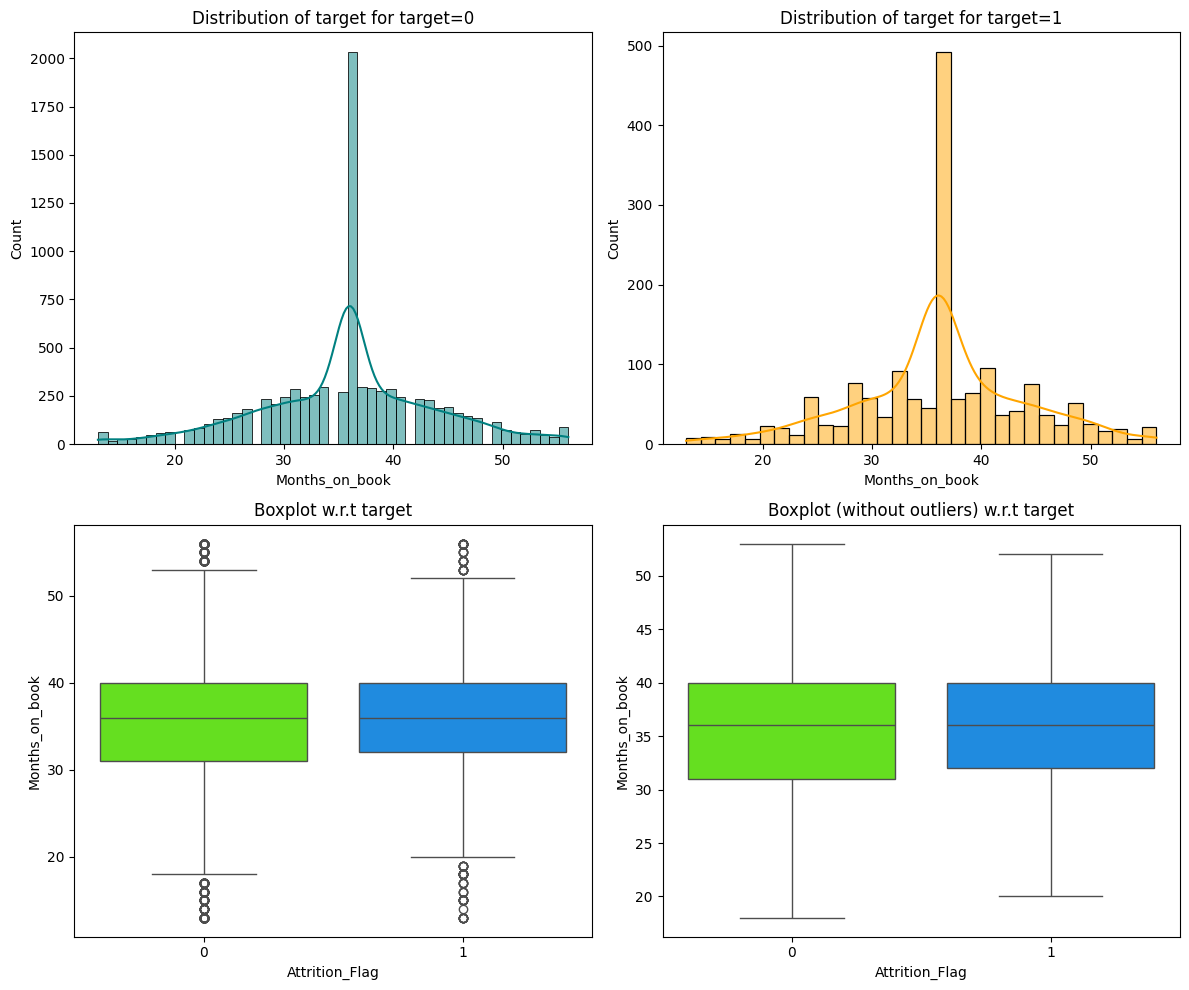

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* The Months_on_book does not vary based on the Attrition_Flag.

####Observations on  Attrition_Flag vs Avg_Open_To_Buy

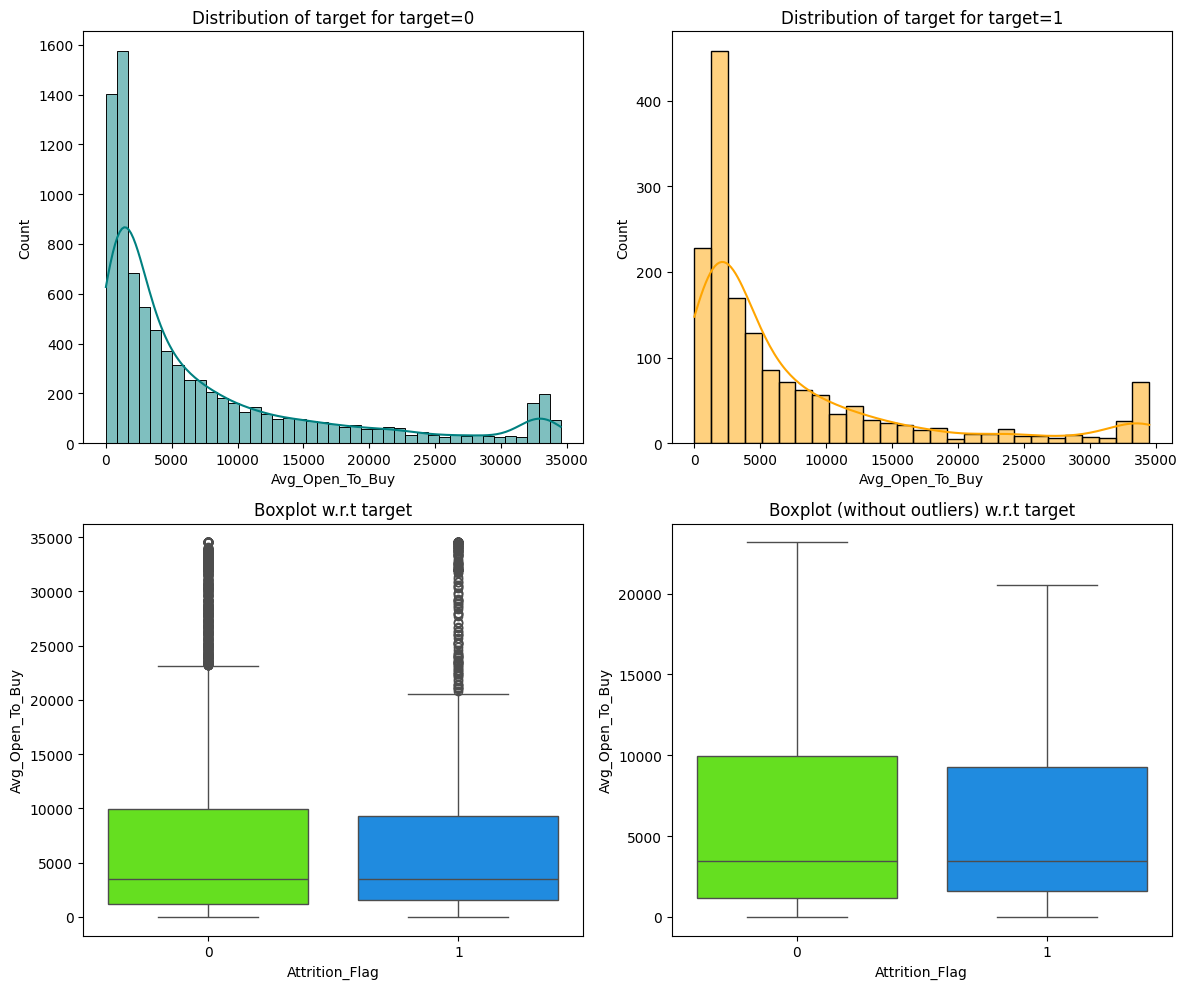

<Figure size 640x480 with 0 Axes>

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")
plt.savefig("output.jpg", bbox_inches='tight')

* For the Attrited Customers the variance of Avg_Open_To_Buy is less as compared to the Existing Customers.

## Data Pre-processing

### Outlier Detection

In [ ]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])
Q1 = numeric_data.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

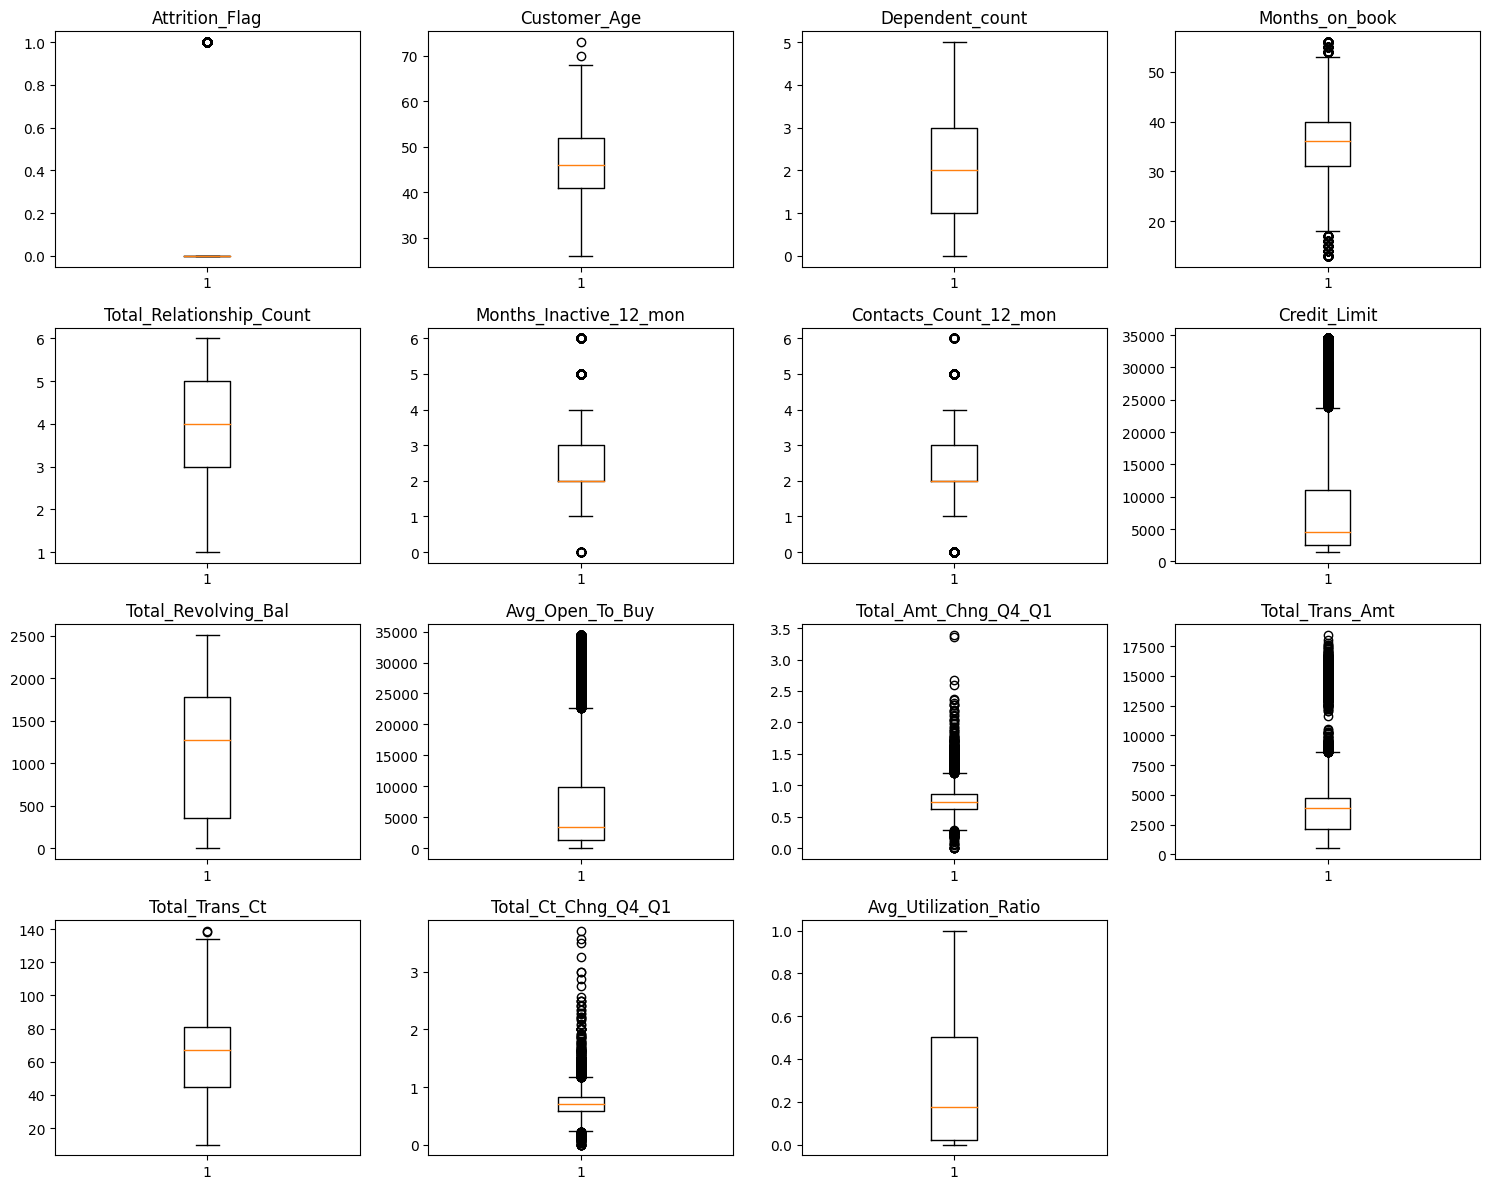

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The ouliers can be valid values for the columns. So we will not treat them as outliers.

### Train-Test Split

In [ ]:
# creating the copy of the dataframe
df1 = data.copy()

In [ ]:
# Dividing train data into X and y

X = df1.drop(["Attrition_Flag"], axis=1)
y = df1["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Missing value imputation




In [ ]:
df1['Income_Category']=df1['Income_Category'].replace('abc', np.nan, inplace=True)

#reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]
numeric_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

# Fit and transform the train data
X_train[categorical_cols] = imputer.fit_transform(X_train[categorical_cols])

# Transform the validation data
X_val[categorical_cols]  = imputer.transform(X_val[categorical_cols])
# Transform the test data
X_test[categorical_cols] = imputer.transform(X_test[categorical_cols])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

### Let's look at the unqiue values of all the categories

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
abc                654
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1095
M     931
Name: count, dtype: int64
******************************
Education_Level
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: count, dtype: int64
******************************
Marital_Status
Married     1100
Single       770
Divorced     156
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    736
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
abc               221
$120K +           136
Name: count, dtype: int64
******************************
Card_Category
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
abc                654
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 30) (2026, 30) (2026, 30)


In [ ]:
X_train.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_abc',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1,verbosity = 0)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

dtree: 1.0
Bagging: 0.9764344262295082
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
XGboost: 1.0

Validation Performance:

dtree: 0.7822085889570553
Bagging: 0.7484662576687117
Random forest: 0.7239263803680982
GBM: 0.8588957055214724
Adaboost: 0.852760736196319
XGboost: 0.9079754601226994


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.7822, Difference: 0.2178
Bagging: Training Score: 0.9764, Validation Score: 0.7485, Difference: 0.2280
Random forest: Training Score: 1.0000, Validation Score: 0.7239, Difference: 0.2761
GBM: Training Score: 0.8750, Validation Score: 0.8589, Difference: 0.0161
Adaboost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
XGboost: Training Score: 1.0000, Validation Score: 0.9080, Difference: 0.0920


* XGboost has the best performance on validation but the training data is overfitting.
* GBM and Adaboost provide more generalized results as compared to XGboost.

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 30)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1,verbosity = 0)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

dtree: 1.0
Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.9792116101196313
Adaboost: 0.9645028436948421
XGboost: 1.0

Validation Performance:

dtree: 0.843558282208589
Bagging: 0.8773006134969326
Random forest: 0.8588957055214724
GBM: 0.9079754601226994
Adaboost: 0.8926380368098159
XGboost: 0.901840490797546


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.8436, Difference: 0.1564
Bagging: Training Score: 0.9975, Validation Score: 0.8773, Difference: 0.1201
Random forest: Training Score: 1.0000, Validation Score: 0.8589, Difference: 0.1411
GBM: Training Score: 0.9792, Validation Score: 0.9080, Difference: 0.0712
Adaboost: Training Score: 0.9645, Validation Score: 0.8926, Difference: 0.0719
XGboost: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982


* GBM has the best performance on validation followed by XGboost

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1,verbosity = 0)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

dtree: 1.0
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9795081967213115
Adaboost: 0.9528688524590164
XGboost: 1.0

Validation Performance:

dtree: 0.8957055214723927
Bagging: 0.9171779141104295
Random forest: 0.9263803680981595
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
XGboost: 0.9601226993865031


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043
Bagging: Training Score: 0.9908, Validation Score: 0.9172, Difference: 0.0736
Random forest: Training Score: 1.0000, Validation Score: 0.9264, Difference: 0.0736
GBM: Training Score: 0.9795, Validation Score: 0.9571, Difference: 0.0225
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
XGboost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399


* Adaboost and XGboost have the best performance on validation.
* Adaboost and GBM are better in generalizing the data as compared to XGboost

After building 18 models, it was observed that both the GBM ,Adaboost and XGboost models, trained on an undersampled dataset exhibited strong performance on both the training and validation datasets.

GBM ,Adaboost models also perform well on oversampled data.

Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance.

We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before.

### HyperparameterTuning

#### Tuning AdaBoost using Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.94764436490985:
CPU times: user 4.96 s, sys: 462 ms, total: 5.42 s
Wall time: 3min 23s


In [ ]:
tuned_adb_over=AdaBoostClassifier(random_state=1,
                            n_estimators= 100,
                            learning_rate= 0.1,
                            base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1),

)
tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

,Accuracy,Recall,Precision,F1
0,0.972,0.974,0.971,0.972


In [ ]:
adb_val_over= model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

,Accuracy,Recall,Precision,F1
0,0.963,0.911,0.868,0.889


#### Tuning AdaBoost using Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9467451596023025:
CPU times: user 1.7 s, sys: 107 ms, total: 1.81 s
Wall time: 47.9 s


In [ ]:
tuned_adb_un=AdaBoostClassifier(random_state=1,
                            n_estimators= 100,
                            learning_rate= 0.05,
                            base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),

)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [ ]:
# Checking model's performance on training set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

,Accuracy,Recall,Precision,F1
0,0.938,0.966,0.734,0.834


#### Tuning Gradient Boosting using Undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9518576661433805:
CPU times: user 2.12 s, sys: 165 ms, total: 2.28 s
Wall time: 1min 15s


In [ ]:
tuned_gb_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gb_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gb_train_un = model_performance_classification_sklearn(
    tuned_gb_un, X_train_un, y_train_un
)
gb_train_un

,Accuracy,Recall,Precision,F1
0,0.978,0.985,0.973,0.979


In [ ]:
# Checking model's performance on validation set
gb_val_un = model_performance_classification_sklearn(tuned_gb_un, X_val, y_val)
gb_val_un

,Accuracy,Recall,Precision,F1
0,0.940,0.957,0.743,0.836


#### Tuning Gradient Boosting using Oversampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9523506321076025:
CPU times: user 7.44 s, sys: 717 ms, total: 8.16 s
Wall time: 4min 58s


In [ ]:
tuned_gb_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gb_over.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gb_train_over = model_performance_classification_sklearn(tuned_gb_over, X_train_over, y_train_over)
gb_train_over

,Accuracy,Recall,Precision,F1
0,0.959,0.975,0.946,0.960


In [ ]:
# Checking model's performance on validation set
gb_val_over = model_performance_classification_sklearn(tuned_gb_over, X_val, y_val)
gb_val_over

,Accuracy,Recall,Precision,F1
0,0.940,0.957,0.743,0.836


#### Tuning XGBoost Model with Undersampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 3.36 s, sys: 199 ms, total: 3.56 s
Wall time: 55.3 s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample= 0.7,
    scale_pos_weight= 5,
    n_estimators= 50,
    learning_rate= 0.01,
    gamma=3,
)

tuned_xgb.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train = model_performance_classification_sklearn(
    tuned_xgb, X_train_un, y_train_un
)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.764,1.000,0.680,0.809


In [ ]:
xgb_val = model_performance_classification_sklearn(
    tuned_xgb, X_val, y_val
)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.591,1.000,0.282,0.441


* This model has a great Recall score in both the train and validation set but in other metrics the performance is very poor in the validation set, so we will not consider this model.

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train_over.T,
        adb_train_un.T,
        gb_train_over.T,
        gb_train_un.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost using Oversampled data",
    "AdaBoost using Undersampled data",
    "Gradient Boosting using Oversampled data",
  " Gradient Boosting using Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost using Oversampled data,AdaBoost using Undersampled data,Gradient Boosting using Oversampled data,Gradient Boosting using Undersampled data
Accuracy,0.972,0.973,0.959,0.978
Recall,0.974,0.978,0.975,0.985
Precision,0.971,0.968,0.946,0.973
F1,0.972,0.973,0.960,0.979


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [  adb_val_over.T,adb_val_un.T, gb_val_over.T, gb_val_un.T], axis=1,
)
models_val_comp_df.columns = [
        "AdaBoost using Oversampled data",
    "AdaBoost using Undersampled data",
    "Gradient Boosting using Oversampled data",
    "Gradient Boosting using Undersampled data",

]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost using Oversampled data,AdaBoost using Undersampled data,Gradient Boosting using Oversampled data,Gradient Boosting using Undersampled data
Accuracy,0.963,0.938,0.940,0.940
Recall,0.911,0.966,0.957,0.957
Precision,0.868,0.734,0.743,0.743
F1,0.889,0.834,0.836,0.836


* AdaBoost model trained with undersampled data has highest recall in validation set and it also has generalised performance, so let's consider it as the best model.

### Test set final performance

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb_un, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.936,0.969,0.726,0.830


* The Adaboost model trained on Undersampled data has given ~97% recall on the test set.
* This performance is in line with what we achieved with this model on the train and validation sets.
* So, this is a generalized model.

### Feature Importance

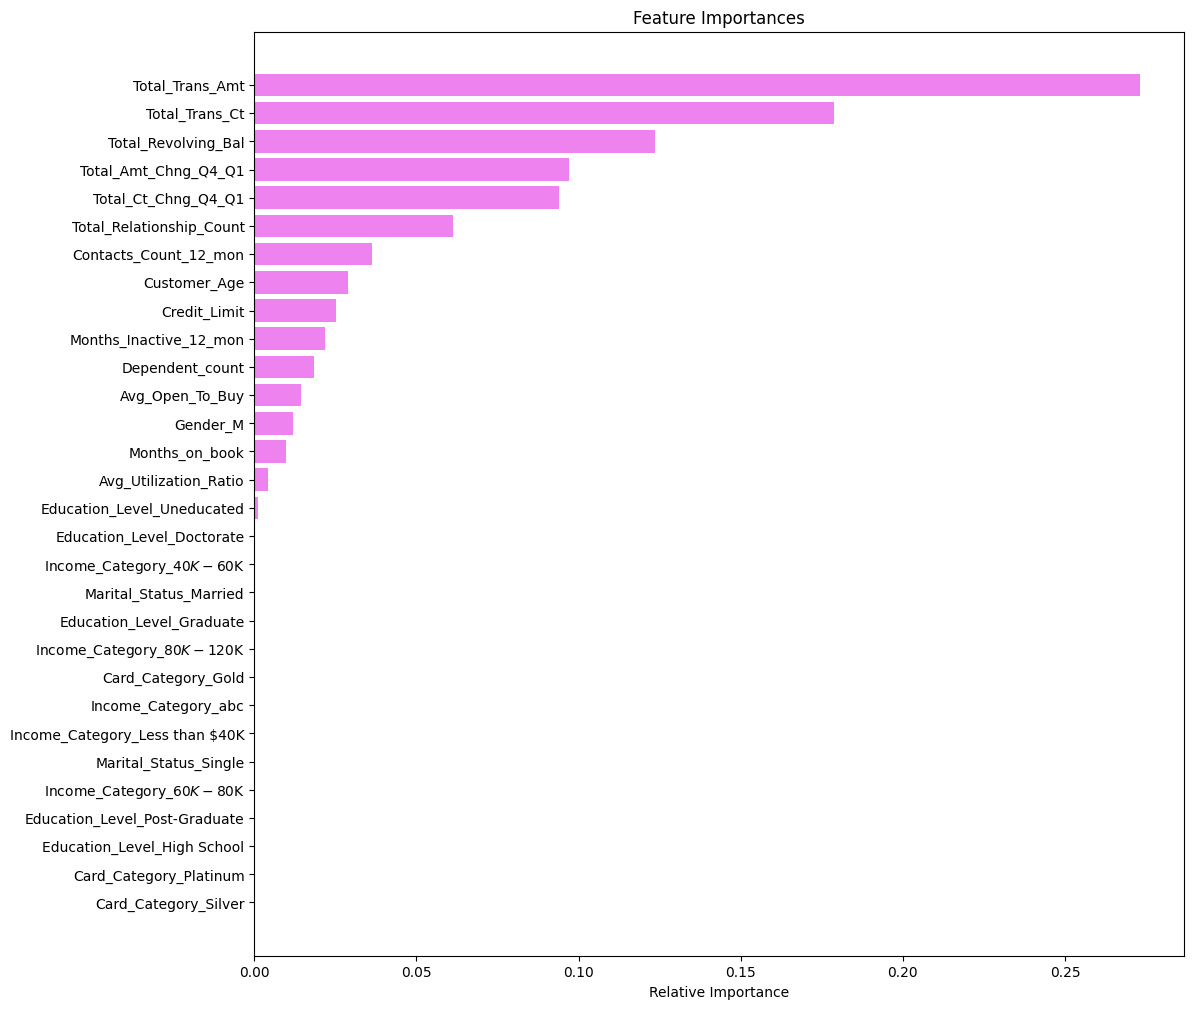

In [ ]:
feature_names = X_train.columns
importances = tuned_adb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Contacts_Count_12_mon,Customer_Age,Credit_Limit,Months_Inactive_12_mon are the important features for making predictions.

# Business Insights and Conclusions

***

Below are the conclusions and business recommendations to reduce credit card account closures:

* The most important data criterion seen for Attrition is the lack of transactions done on the credit card and the transaction amount.
  Customers with transaction amounts going less than $900 with transaction counts less than 50 are especially the most at-risk accounts for Attrition.

* A good revolving balance of an account indicates lower chances of attrition. We see that the probability of attrition goes up when customers maintain a very low revolving balance or zero revolving balance.
  Additionally, we see the attrition to be high beyond the revolving balance of 2515.

  Therefore a "Goldilocks Zone" for revolving balance can be established and the operations team can personally reach out to customers deviating from this zone as that might mean customers contemplating Attrition for the account.

 Revolving balances from 1400 to 1700 is the most sound with the lowest attrition rates.
To establish a Goldilocks Zone we will need to consider revolving balance along with the credit limit of the account.   

* Line of credit for closed accounts is mostly low with the highest percentage around the 2000 mark. But we also attrition rate high for accounts with credit lines above 22000. This might indicate a poor satisfaction factor leading to closures. Customers with higher credit lines would need to be incentivised and customer relation needs to be focused to ensure higher loyalty.  

* The data indicates that the highest Attrition rates are found in the middle ages, i.e. early 40s to early 50s.

* We see that Attrition is low for customers who have multiple relationships with the bank. This might be an incentive parameter that can be used to sway the potentially risky accounts from closing. Operations must initiate contact with the customers of the at-risk accounts based on the aforementioned points and offer other financial offers/packages.  

* Data indicated that the credit card accounts can be closed by customers without being inactive for any month.
  Therefore, operations need to be vigilant and maintain a close relationship with all "at-risk" accounts.  